<a href="https://colab.research.google.com/github/ftkovr9k/Seeds-Wheat/blob/main/Seeds_Wheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.

Data set: https://archive.ics.uci.edu/dataset/236/seeds

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
columns = ["area", "perimeter", "compactness", "length", "width", "acoef", "groove", "class"]
df = pd.read_csv("/content/drive/MyDrive/Seeds Wheat data set/seeds_dataset.txt", names=columns, sep="\s+")

In [53]:
df.head()

,area,perimeter,compactness,length,width,acoef,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [54]:
org_class = df.pop("class")
df.head()

,area,perimeter,compactness,length,width,acoef,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


#k-Means Clustering

In [55]:
from sklearn.cluster import KMeans

In [56]:
#Choosing 2 features

x = "perimeter"
y = "acoef"

X = df[[x, y]].values

In [57]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_
print(clusters)

[1 1 1 1 1 1 2 1 1 1 0 1 2 2 2 2 0 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1
 1 1 0 2 1 2 0 1 1 1 1 1 1 2 0 2 2 1 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 1 0 0 1
 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 2 0 2 2
 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 0 0 2 0 2 2 2 2 0 1 2 2 2 2 0
 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 0 2 0]


In [58]:
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))))

In [59]:
clusters_df.columns = [x,y,"class"]

In [60]:
clusters_df

,perimeter,acoef,class
0,14.84,2.221,1.0
1,14.57,1.018,1.0
2,14.09,2.699,1.0
3,13.94,2.259,1.0
4,14.99,1.355,1.0
...,...,...,...
205,13.20,3.631,2.0
206,12.88,4.325,2.0
207,13.66,8.315,0.0
208,13.21,3.598,2.0


<Axes: xlabel='perimeter', ylabel='acoef'>

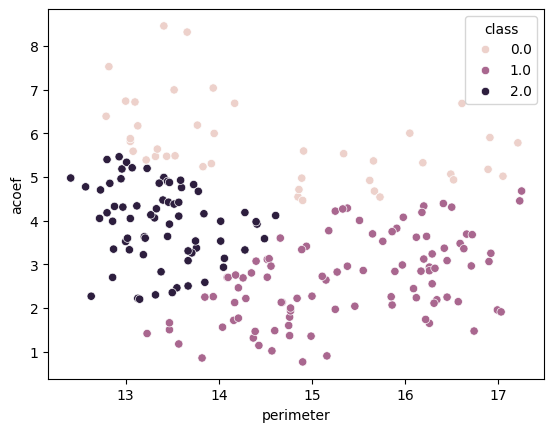

In [61]:
sns.scatterplot(x=x, y=y, hue='class', data=clusters_df)

#Principal Component Analysis (PCA)

In [62]:
from sklearn.decomposition import PCA

In [63]:
X=df.values

In [64]:
pca = PCA(n_components=2)

In [65]:
transformed_x = pca.fit_transform(X)

In [66]:
print(X.shape)
print(transformed_x.shape)

(210, 7)
(210, 2)


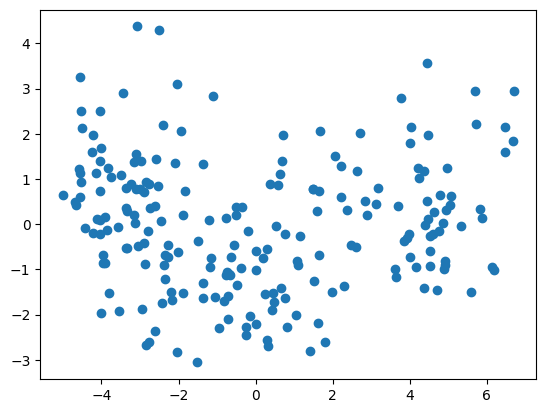

In [67]:
#Transformed 7D into 2D representation. Plot for visualization
plt.scatter(transformed_x[:, 0], transformed_x[:,1] )
plt.show()

In [68]:
pca_columns = ["pca1", "pca2", "class"]
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=pca_columns)

<Axes: xlabel='pca1', ylabel='pca2'>

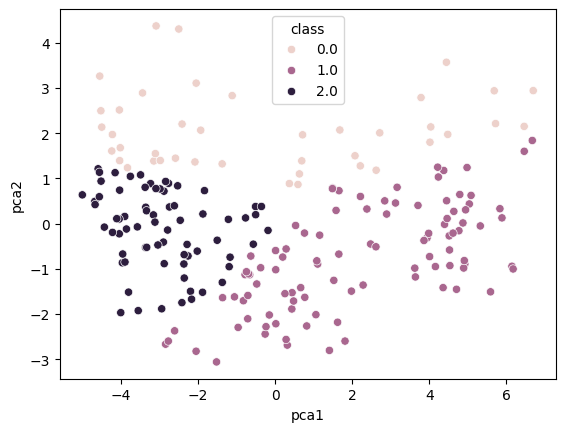

In [70]:
sns.scatterplot(x='pca1' , y='pca2', hue="class", data=kmeans_pca_df)